<a href="https://colab.research.google.com/github/Shimad01/Credict-Card/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Font and Database: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

import warnings
warnings.filterwarnings('ignore')

## a) Null

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv')
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,7.094854e-13,1.875015e-12,1.053488e-12,7.137527e-13,-1.491363e-13,-5.225914e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## b) Information - Raw Dataset

In [5]:
y = df[['Class']]
fraud = float(100*y.sum()/y.shape[0])
print(f'{y.value_counts()}')
print(f'Fraud: {round(fraud,4)}%')

Class
0        284315
1           492
dtype: int64
Fraud: 0.1727%


In [6]:
X = df.drop(columns=['Time', 'Class'])
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [7]:
def violin_plot(X, inicial, final):
  data_plot = pd.concat([y, X.iloc[:,inicial:final]], axis = 1)
  data_plot = pd.melt(data_plot, id_vars = 'Class', var_name = 'variable', value_name = 'values')

  plt.figure(figsize = (20,10))
  sns.violinplot(x = 'variable',y = 'values', data = data_plot, hue = 'Class', split = True)

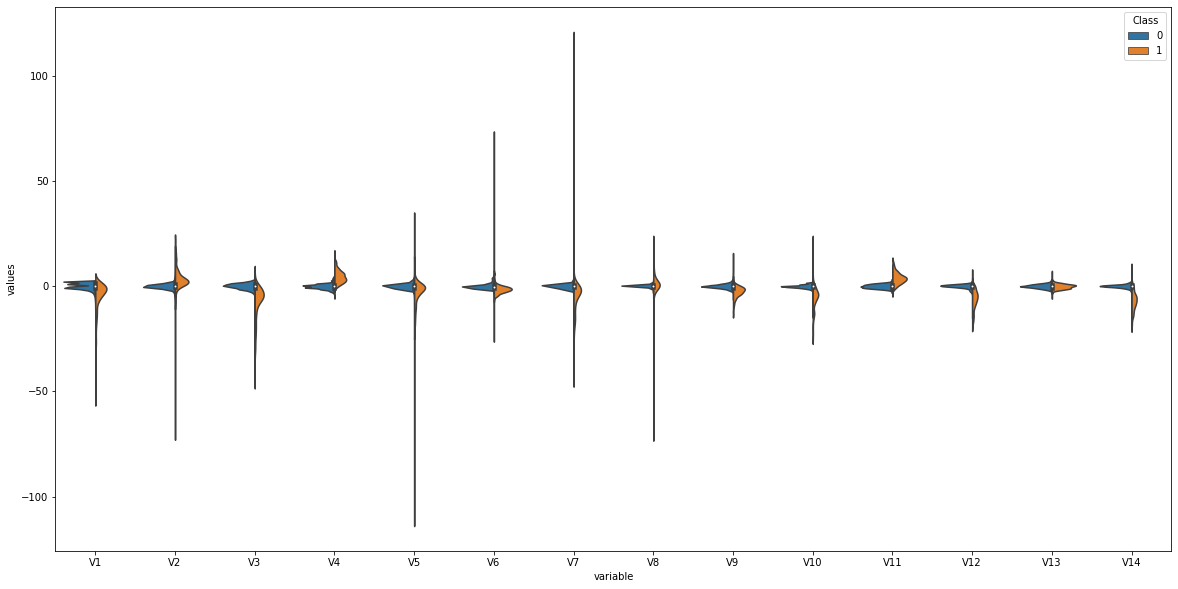

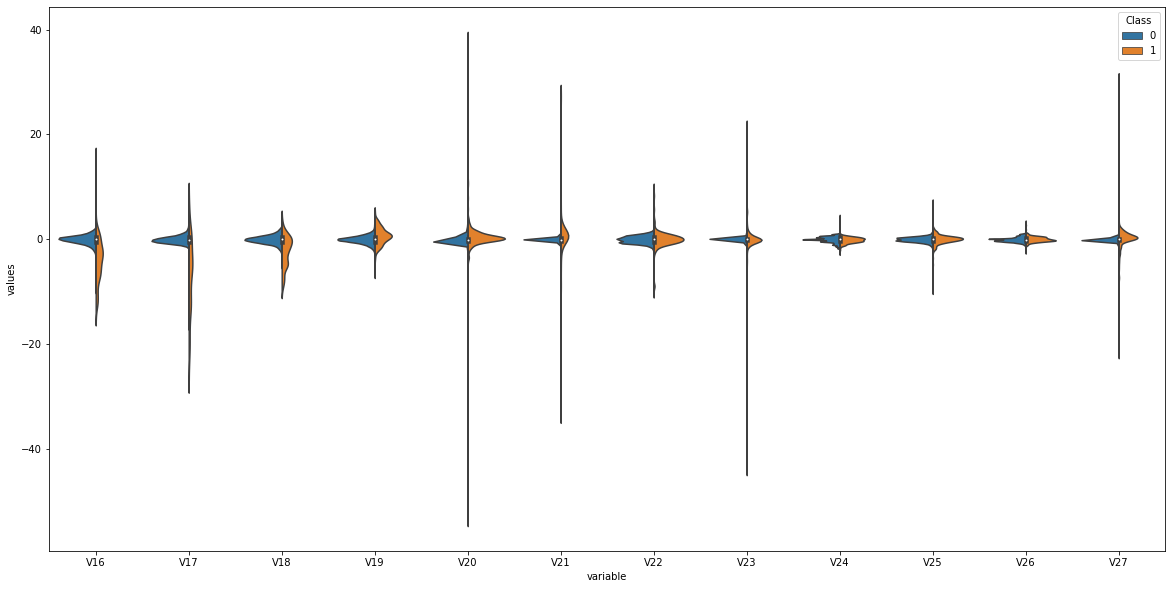

In [8]:
violin_plot(X, 0, 14)
violin_plot(X, 15, 27)

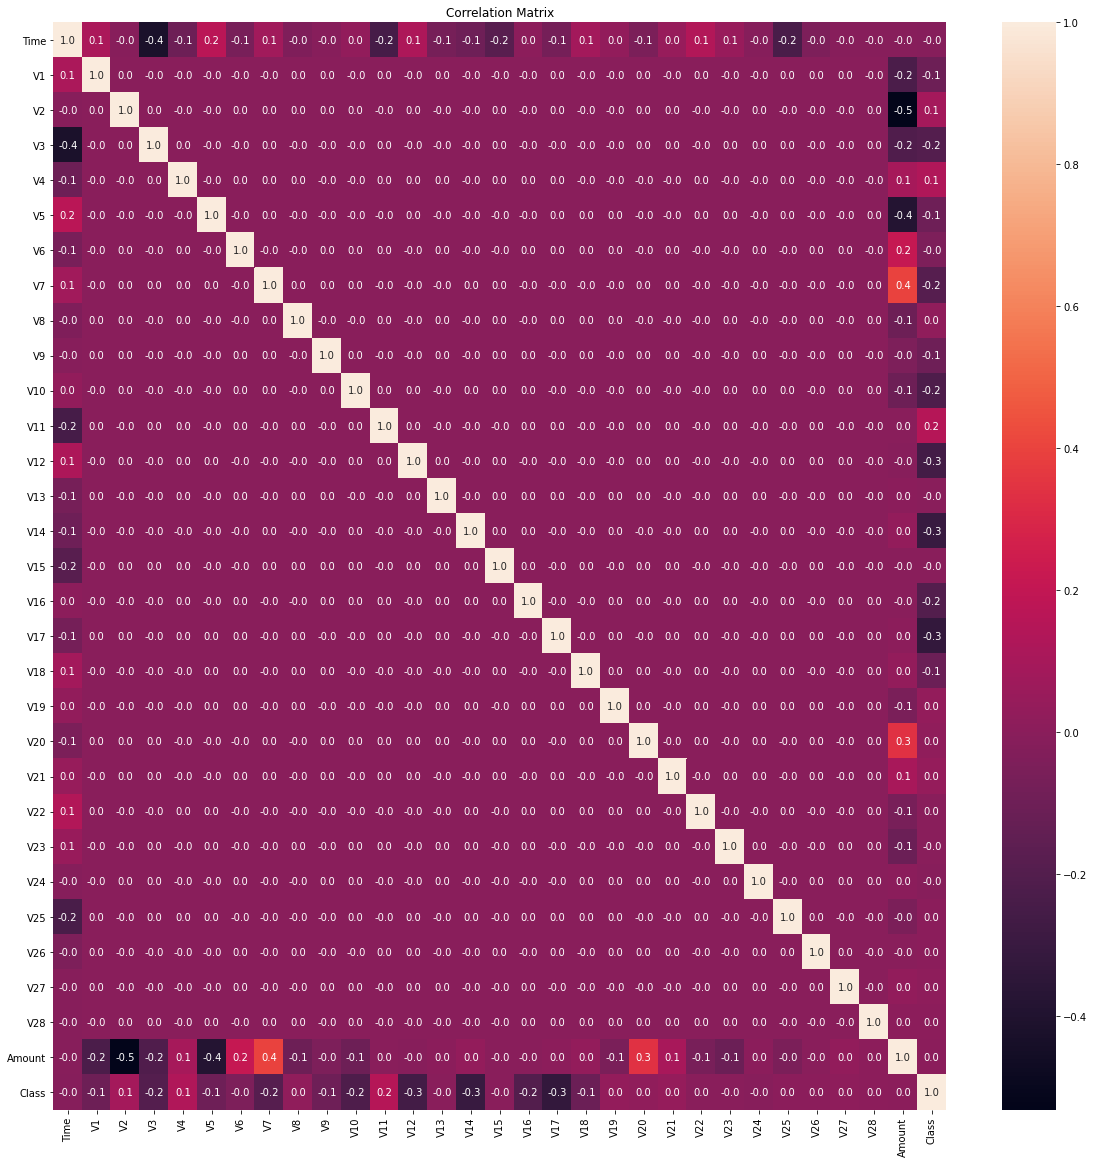

In [10]:
plt.figure(figsize = (20,20))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot = True, fmt = '.1f')

No high correlation between feautures

## c) - Train and test

In [12]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [13]:
scaler = RobustScaler()

df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

X = df.drop(['Class'], axis = 1)
Y = df[['Class']]

In [14]:
SEED = 1234
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# 2 - Models

## a) Function

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

def predict_real (y_test, y_pred, model):
  print(f'Acuracy: {round(accuracy_score(y_test, y_pred),4)}')
  print(f'AUC: {round(roc_auc_score(y_test, y_pred),4)}')
  print(f'F1 Score: {round(f1_score(y_test, y_pred),4)}\n')

  matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize = (5,4))
  plt.title(f'Model - {model}')
  sns.heatmap(matrix, xticklabels = ['Normal', 'Fraud'],  
            yticklabels = ['Normal', 'Fraud'], annot = True, 
            fmt = 'd').set(xlabel = 'Predict',ylabel = 'Real') 
  plt.show() 
    

## b) AdaBoost

In [16]:
from sklearn.ensemble import AdaBoostClassifier

SEED = 1234
random.seed(SEED)

model_ABC = AdaBoostClassifier()
model_ABC.fit(X_train, y_train)

y_ADA = model_ABC.predict(X_test)

Acuracy: 0.9991
AUC: 0.8009
F1 Score: 0.7066



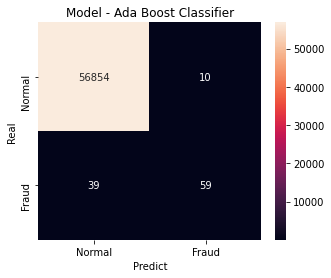

In [17]:
predict_real(y_test, y_ADA, 'Ada Boost Classifier')

## c) Random Forrest

In [18]:
from sklearn.ensemble import RandomForestClassifier

SEED = 1234
random.seed(SEED)

model_RF = RandomForestClassifier(n_estimators = 10)
model_RF.fit(X_train, y_train)

y_RF = model_RF.predict(X_test)

Acuracy: 0.9994
AUC: 0.852
F1 Score: 0.8023



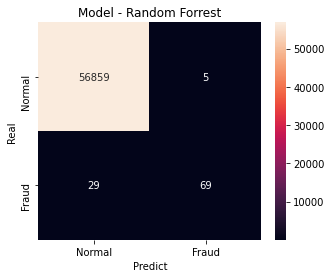

In [19]:
predict_real(y_test, y_RF, 'Random Forrest')

## d) Random Forrest Balance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

SEED = 1234
random.seed(SEED)

model_RFB = RandomForestClassifier(class_weight = 'balanced')
model_RFB.fit(X_train, y_train)

y_RFB = model_RFB.predict(X_test)

In [ ]:
predict_real(y_test, y_RFB, 'Random Forrest Balanced')

# 3 - SMOTE Models

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
X_smote, y_smote = smote.fit_sample(X, y)
ax = sns.countplot(x=y_smote)

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 1234)

## a) ADA BOOST

In [ ]:
SEED = 1234
random.seed(SEED)

model_ABC_smote = AdaBoostClassifier()
model_ABC_smote.fit(X_train_smote, y_train_smote)

y_ADA_smote = model_ABC_smote.predict(X_test_smote)

In [ ]:
predict_real(y_test_smote, y_ADA_smote, 'Random Forrest - SMOTE')

## b) Random Forest

In [ ]:
SEED = 1234
random.seed(SEED)

model_RF_smote = RandomForestClassifier(n_estimators = 10)
model_RF_smote.fit(X_train_smote, y_train_smote)

y_RF_smote = model_RF_smote.predict(X_test_smote)

In [ ]:
predict_real(y_test_smote, y_RF_smote, 'Random Forrest - SMOTE')

In [ ]:
y_RF_smote_real = model_RF_smote.predict(X_test)
predict_real(y_test, y_RF_smote_real, 'Random Forrest - SMOTE (original base)')

Best model --> Random Forest Smote (model_RF_smote)

#4 - Reducing features

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model_RF_smote.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [ ]:
importances.query('importance > 0.05')

In [ ]:
X_train_smote_top8 = pd.DataFrame(X_train_smote, columns = X_train.columns)
X_train_smote_top8 = X_train_smote_top8[['V14','V17', 'V3', 'V10', 'V16', 'V11', 'V7', 'V2']]

X_test_smote_top8 = pd.DataFrame(X_test_smote, columns = X_test.columns)
X_test_smote_top8 = X_test_smote_top8[['V14','V17', 'V3', 'V10', 'V16', 'V11', 'V7', 'V2']]

In [ ]:
SEED = 1234
random.seed(SEED)

model_RF_smote_top8 = RandomForestClassifier(n_estimators = 10)
model_RF_smote_top8.fit(X_train_smote_top8, y_train_smote)

y_RF_smote_top8 = model_RF_smote_top8.predict(X_test_smote_top8)

In [ ]:
predict_real(y_test_smote, y_RF_smote_top8, 'Random Forrest - SMOTE')

In [ ]:
y_RF_smote_top8_real = model_RF_smote.predict(X_test)
predict_real(y_test, y_RF_smote_top8_real, 'Random Forrest - SMOTE (original base)')

The result is the same when just Top 8 features (V14, V17, V3, V10, V16, V11, V7, V2) is used. That makes it possible to reduce the cost of data collect.